# **Evaluation Overview**

This notebook presents a comparative evaluation of multiple keyword extraction models applied to a selection of 15 movies.  
The models include:

- the **baseline** KeyBERT model  
- three enhanced variants: **Reranker**, **Sentiment-aware**, and **Metadata-based**

Each model is assessed using a diverse set of evaluation metrics, as defined in the accompanying evaluation modules.

The analysis includes:

- Aggregated comparison tables across metrics  
- Per-movie performance visualizations  
- Observations on model behavior and consistency

The goal is to provide a structured overview of each model’s performance, highlighting differences in effectiveness across both global and movie-specific contexts, without drawing premature conclusions.

## Reranker Model Evaluation

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Load the evaluation data
df = pd.read_csv("base_vs_reranker_evaluation.csv")

# Filter rows by model type and sort by movie title
df_base = df[df["Model"] == "base"].sort_values(by="Movie").reset_index(drop=True)
df_rerank = df[df["Model"] == "reranker"].sort_values(by="Movie").reset_index(drop=True)

# Create a comparison dataframe with all key metrics, including nDCG@5
df_metrics_rerank = pd.DataFrame({
    "Movie": df_base["Movie"],
    "Base Weighted Precision": df_base["Weighted Precision"],
    "Reranker Weighted Precision": df_rerank["Weighted Precision"],
    "Base Weighted Recall": df_base["Weighted Recall"],
    "Reranker Weighted Recall": df_rerank["Weighted Recall"],
    "Base Weighted F1": df_base["Weighted F1-score"],
    "Reranker Weighted F1": df_rerank["Weighted F1-score"],
    "Base nDCG@5": df_base["nDCG@5"],
    "Reranker nDCG@5": df_rerank["nDCG@5"]
})


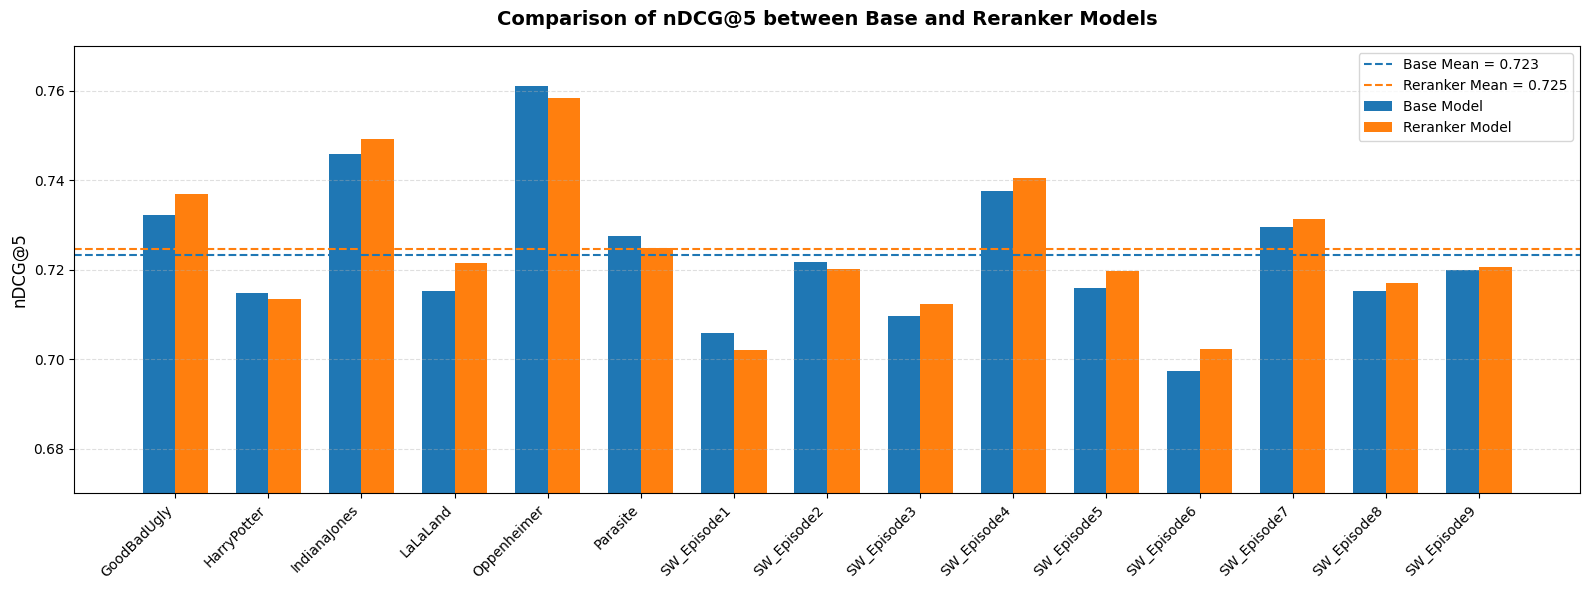

In [27]:
# Extract movie titles and nDCG@5 values
movies = df_metrics_rerank["Movie"]
base_ndcg = df_metrics_rerank["Base nDCG@5"]
reranker_ndcg = df_metrics_rerank["Reranker nDCG@5"]

# Set bar positions
x = np.arange(len(movies))
width = 0.35

# Define colors
base_color = "#1f77b4"
rerank_color = "#ff7f0e"

# Calculate means
mean_base = base_ndcg.mean()
mean_reranker = reranker_ndcg.mean()

# Create the figure
plt.figure(figsize=(16, 6))
bars1 = plt.bar(x - width/2, base_ndcg, width, label='Base Model', color=base_color)
bars2 = plt.bar(x + width/2, reranker_ndcg, width, label='Reranker Model', color=rerank_color)

# Add average lines
plt.axhline(mean_base, color=base_color, linestyle="--", linewidth=1.5, label=f"Base Mean = {mean_base:.3f}")
plt.axhline(mean_reranker, color=rerank_color, linestyle="--", linewidth=1.5, label=f"Reranker Mean = {mean_reranker:.3f}")

# Customize axes and title
plt.ylabel("nDCG@5", fontsize=12)
plt.title("Comparison of nDCG@5 between Base and Reranker Models", fontsize=14, pad=15, fontweight='bold')
plt.xticks(x, movies, rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.67, 0.77)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(fontsize=10)
plt.tight_layout()

#plt.savefig("reranker_ndcg_plot.png", dpi=500, bbox_inches="tight")

# Show the plot
plt.show()

In [28]:
# Prepare a list of summary statistics
summary_data = []

# Define the metrics to include
metrics = ["Weighted Precision", "Weighted Recall", "Weighted F1", "nDCG@5"]
for metric in metrics:
    base_col = f"Base {metric}"
    rerank_col = f"Reranker {metric}"
    
    base_values = df_metrics_rerank[base_col]
    reranker_values = df_metrics_rerank[rerank_col]
    
    base_mean = base_values.mean()
    reranker_mean = reranker_values.mean()
    
    summary_data.append({
        "Metric": metric,
        "Base Mean": f"{base_mean:.3f}",
        "Reranker Mean": f"{reranker_mean:.3f}",
    })

# Create the summary dataframe
df_summary = pd.DataFrame(summary_data)

# Display the table
from IPython.display import display
display(df_summary)


,Metric,Base Mean,Reranker Mean
0,Weighted Precision,0.920,0.926
1,Weighted Recall,0.475,0.474
2,Weighted F1,0.627,0.627
3,nDCG@5,0.723,0.725


## Sentiment Model Evaluation

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Load the evaluation data
df = pd.read_csv("base_vs_sentiment_evaluation.csv")

# Filter rows by model type and sort by movie title
df_base = df[df["Model"] == "base"].sort_values(by="Movie").reset_index(drop=True)
df_sent = df[df["Model"] == "sentiment"].sort_values(by="Movie").reset_index(drop=True)

# Create a comparison dataframe with all key metrics
df_metrics_sent = pd.DataFrame({
    "Movie": df_base["Movie"],

    # Standard metrics
    "Base Precision": df_base["Precision"],
    "Sentiment Precision": df_sent["Precision"],
    "Base Recall": df_base["Recall"],
    "Sentiment Recall": df_sent["Recall"],
    "Base F1": df_base["F1-score"],
    "Sentiment F1": df_sent["F1-score"],

    # Weighted metrics
    "Base Weighted Precision": df_base["Weighted Precision"],
    "Sentiment Weighted Precision": df_sent["Weighted Precision"],
    "Base Weighted Recall": df_base["Weighted Recall"],
    "Sentiment Weighted Recall": df_sent["Weighted Recall"],
    "Base Weighted F1": df_base["Weighted F1-score"],
    "Sentiment Weighted F1": df_sent["Weighted F1-score"],

    # Semantic metrics
    "Base Semantic Precision": df_base["Semantic Precision"],
    "Sentiment Semantic Precision": df_sent["Semantic Precision"],
    "Base Semantic Recall": df_base["Semantic Recall"],
    "Sentiment Semantic Recall": df_sent["Semantic Recall"],
    "Base Semantic F1": df_base["Semantic F1-score"],
    "Sentiment Semantic F1": df_sent["Semantic F1-score"],

    # Sentiment alignment metrics
    "Base ASS": df_base["Avg Sentiment Similarity"],
    "Sentiment ASS": df_sent["Avg Sentiment Similarity"],
    "Base RSSS": df_base["Review-wise Sampled Similarity"],
    "Sentiment RSSS": df_sent["Review-wise Sampled Similarity"]
})


In [31]:
# Prepare a list of summary statistics
summary_data_sent = []

# Define all metrics to include (matching df_metrics_sent columns, excluding 'Movie')
metrics = [
    "Precision", "Recall", "F1",
    "Weighted Precision", "Weighted Recall", "Weighted F1",
    "Semantic Precision", "Semantic Recall", "Semantic F1",
    "ASS", "RSSS"
]

for metric in metrics:
    base_col = f"Base {metric}"
    sent_col = f"Sentiment {metric}"
    
    base_values = df_metrics_sent[base_col]
    sent_values = df_metrics_sent[sent_col]
    
    base_mean = base_values.mean()
    sent_mean = sent_values.mean()
    
    summary_data_sent.append({
        "Metric": metric,
        "Base Mean": f"{base_mean:.3f}",
        "Sentiment-aware Mean": f"{sent_mean:.3f}",
    })

# Create the summary dataframe
df_summary = pd.DataFrame(summary_data_sent)

# Display the styled summary table
df_summary.style.set_caption("Mean Scores of Evaluation Metrics (Base vs Sentiment-aware)")


# Display the table
from IPython.display import display
display(df_summary)


,Metric,Base Mean,Sentiment-aware Mean
0,Precision,0.911,0.887
1,Recall,0.354,0.335
2,F1,0.509,0.486
3,Weighted Precision,0.920,0.898
4,Weighted Recall,0.475,0.445
5,Weighted F1,0.627,0.595
6,Semantic Precision,0.934,0.901
7,Semantic Recall,0.822,0.856
8,Semantic F1,0.873,0.876
9,ASS,0.916,0.924


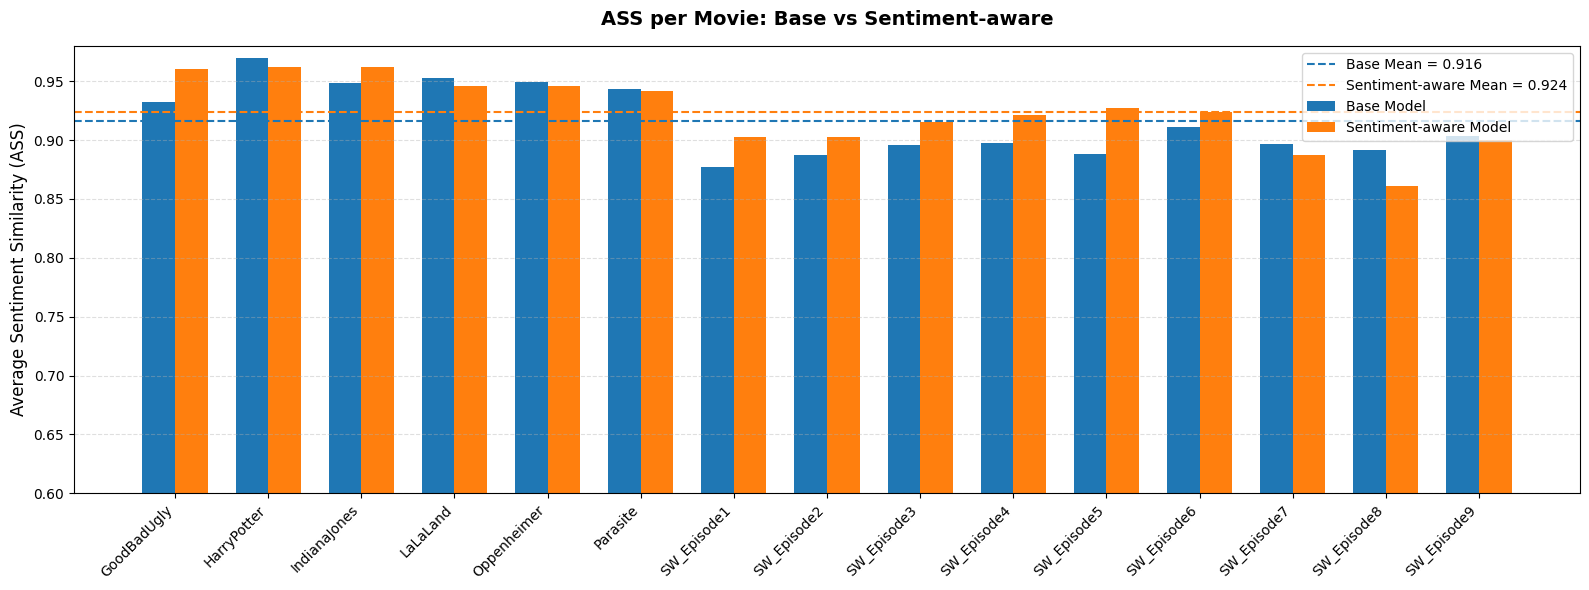

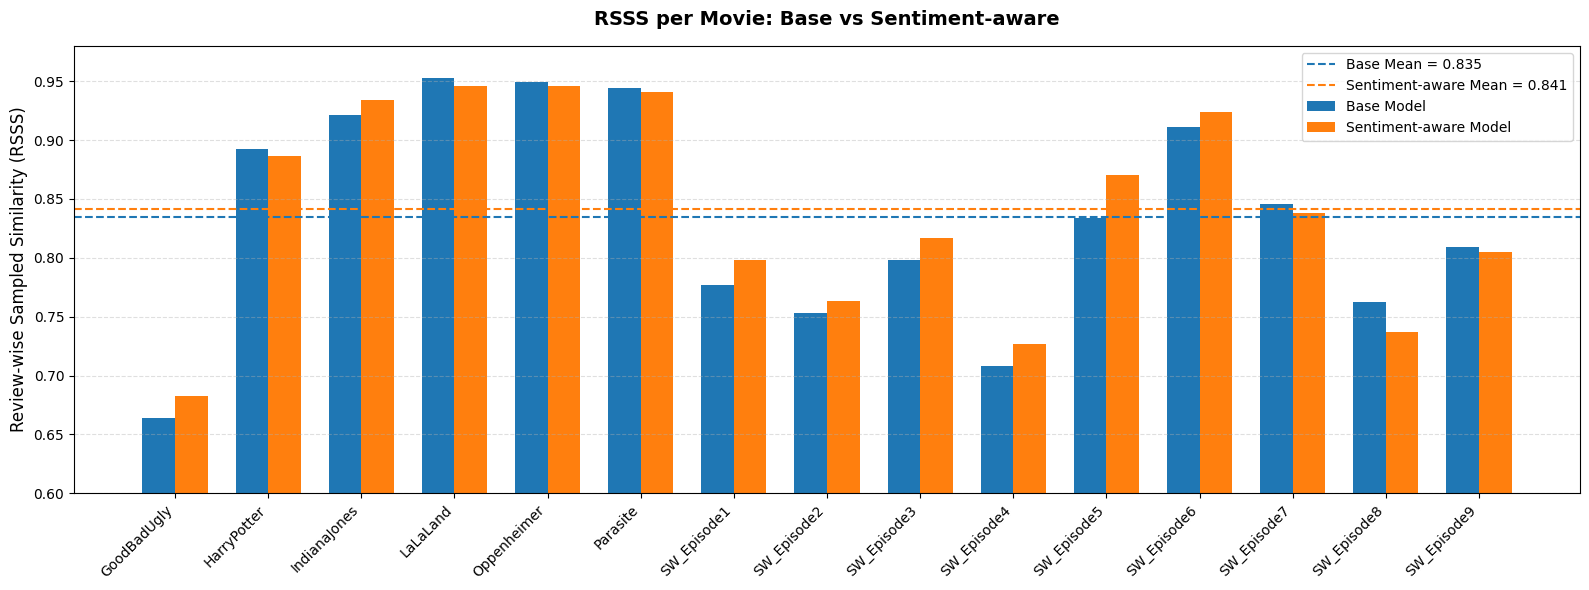

In [32]:
# Extract movie titles and sentiment alignment metrics from df_metrics_sent
movies = df_metrics_sent["Movie"]
ass_base = df_metrics_sent["Base ASS"]
ass_sentiment = df_metrics_sent["Sentiment ASS"]
rsss_base = df_metrics_sent["Base RSSS"]
rsss_sentiment = df_metrics_sent["Sentiment RSSS"]

# Set positions and bar width
x = np.arange(len(movies))
width = 0.35

# Define colors
base_color = "#1f77b4"
sent_color = "#ff7f0e"

# PLOT 1: Average Sentiment Similarity (ASS)
mean_ass_base = ass_base.mean()
mean_ass_sent = ass_sentiment.mean()

plt.figure(figsize=(16, 6))
plt.bar(x - width/2, ass_base, width, label='Base Model', color=base_color)
plt.bar(x + width/2, ass_sentiment, width, label='Sentiment-aware Model', color=sent_color)

# Add horizontal mean lines
plt.axhline(mean_ass_base, color=base_color, linestyle="--", linewidth=1.5,
            label=f"Base Mean = {mean_ass_base:.3f}")
plt.axhline(mean_ass_sent, color=sent_color, linestyle="--", linewidth=1.5,
            label=f"Sentiment-aware Mean = {mean_ass_sent:.3f}")

# Customize plot
plt.ylabel("Average Sentiment Similarity (ASS)", fontsize=12)
plt.title("ASS per Movie: Base vs Sentiment-aware", fontsize=14, pad=15, fontweight='bold')
plt.xticks(x, movies, rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.6, 0.98)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(fontsize=10)
plt.tight_layout()

#plt.savefig("sentiment_ASS_plot.png", dpi=500, bbox_inches="tight")

plt.show()

# PLOT 2: Review-wise Sampled Sentiment Similarity (RSSS)
mean_rsss_base = rsss_base.mean()
mean_rsss_sent = rsss_sentiment.mean()

plt.figure(figsize=(16, 6))
plt.bar(x - width/2, rsss_base, width, label='Base Model', color=base_color)
plt.bar(x + width/2, rsss_sentiment, width, label='Sentiment-aware Model', color=sent_color)

# Add horizontal mean lines
plt.axhline(mean_rsss_base, color=base_color, linestyle="--", linewidth=1.5,
            label=f"Base Mean = {mean_rsss_base:.3f}")
plt.axhline(mean_rsss_sent, color=sent_color, linestyle="--", linewidth=1.5,
            label=f"Sentiment-aware Mean = {mean_rsss_sent:.3f}")

# Customize plot
plt.ylabel("Review-wise Sampled Similarity (RSSS)", fontsize=12)
plt.title("RSSS per Movie: Base vs Sentiment-aware", fontsize=14, pad=15, fontweight='bold')
plt.xticks(x, movies, rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0.6, 0.98)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(fontsize=10)
plt.tight_layout()

#plt.savefig("sentiment_RSSS_plot.png", dpi=500, bbox_inches="tight")

plt.show()


## Metadata Model Evaluation

In [33]:
import pandas as pd
from IPython.display import display

In [34]:
# Load the evaluation data
df = pd.read_csv("base_vs_metadata_evaluation.csv")

# Filter rows by model type
df_base = df[df["Model"] == "base"]
df_metadata = df[df["Model"] == "metadata"]

# Compute mean values for each model
mean_base = df_base.mean(numeric_only=True)
mean_metadata = df_metadata.mean(numeric_only=True)

# Create a comparison dataframe and round to 3 decimals
mean_comparison = pd.DataFrame({
    "Metric": mean_base.index,
    "Base": mean_base.values,
    "Metadata": mean_metadata.values
}).round(3)

# Create the summary dataframe
df_summary = pd.DataFrame(mean_comparison)

# Display the table
from IPython.display import display
display(df_summary)


,Metric,Base,Metadata
0,Precision,0.911,0.920
1,Recall,0.354,0.357
2,F1-score,0.509,0.514
3,Weighted Precision,0.920,0.925
4,Weighted Recall,0.475,0.483
5,Weighted F1-score,0.627,0.635
6,nDCG@5,0.723,0.736
7,Semantic Precision,0.923,0.924
8,Semantic Recall,0.835,0.841
9,Semantic F1-score,0.876,0.880
